In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Text.csv')
data.head()
data.tail()

,Id,pub_title,dataset_title,dataset_label,cleaned_label
19656,b3498176-8832-4033-aea6-b5ea85ea04c4,RSNA International Trends: A Global Perspectiv...,RSNA International COVID-19 Open Radiology Dat...,RSNA International COVID Open Radiology Database,rsna international covid open radiology database
19657,f77eb51f-c3ac-420b-9586-cb187849c321,MCCS: a novel recognition pattern-based method...,CAS COVID-19 antiviral candidate compounds dat...,CAS COVID-19 antiviral candidate compounds dat...,cas covid 19 antiviral candidate compounds dat...
19658,ab59bcdd-7b7c-4107-93f5-0ccaf749236c,Quantitative Structure–Activity Relationship M...,CAS COVID-19 antiviral candidate compounds dat...,CAS COVID-19 antiviral candidate compounds dat...,cas covid 19 antiviral candidate compounds dat...
19659,fd23e7e0-a5d2-4f98-992d-9209c85153bb,A ligand-based computational drug repurposing ...,CAS COVID-19 antiviral candidate compounds dat...,CAS COVID-19 antiviral candidate compounds dat...,cas covid 19 antiviral candidate compounds dat...
19660,fd23e7e0-a5d2-4f98-992d-9209c85153bb,A ligand-based computational drug repurposing ...,CAS COVID-19 antiviral candidate compounds dat...,CAS COVID-19 antiviral candidate compounds data,cas covid 19 antiviral candidate compounds data


In [ ]:
n_individuos = data.shape[0]
n_variables = data.shape[1]
print("Número de individuos:", n_individuos)
print("Número de variables:", n_variables)

Número de individuos: 19661
Número de variables: 5


No tenemos ningún valor faltante

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19661 entries, 0 to 19660
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             19661 non-null  object
 1   pub_title      19661 non-null  object
 2   dataset_title  19661 non-null  object
 3   dataset_label  19661 non-null  object
 4   cleaned_label  19661 non-null  object
dtypes: object(5)
memory usage: 768.1+ KB


Para saber cuantas categorías hay

In [ ]:
column_name = 'cleaned_label'
unique_categories = data[column_name].unique()
num_categories = len(unique_categories)

print(f"Número de categorías únicas: {num_categories}")
print(f"Categorías: {unique_categories}")


Número de categorías únicas: 130
Categorías: ['national education longitudinal study' 'noaa tidal station'
 'slosh model' 'noaa c cap' 'aging integrated database agid '
 'alzheimers disease neuroimaging initiative' 'aging integrated database'
 'noaa national water level observation network'
 'noaa water level station' 'baltimore longitudinal study of aging blsa '
 'national water level observation network'
 'arms farm financial and crop production practices'
 'beginning postsecondary student'
 'noaa sea lake and overland surges from hurricanes' 'noaa tide gauge'
 'the national institute on aging genetics of alzheimer s disease data storage site'
 'national center for education statistics common core of data'
 'national science foundation survey of industrial research and development'
 'baccalaureate and beyond'
 'noaa international best track archive for climate stewardship'
 'agricultural resource management survey'
 'national teacher and principal survey'
 'international best track a

Tenemos 130 categorías diferentes

In [ ]:
# Contar la cantidad de filas por cada tema
tema_counts = data[column_name].value_counts()

# Crear un DataFrame para mostrar los resultados ordenados
tema_summary = tema_counts.reset_index()
tema_summary.columns = ['Tema', 'Cantidad']

# Mostrar el resumen
print(tema_summary)

# Guardar el resumen en un archivo CSV si lo deseas
tema_summary.to_csv('resumen_temas.csv', index=False)

                                                  Tema  Cantidad
0                                                 adni      3673
1    alzheimer s disease neuroimaging initiative adni       2400
2    trends in international mathematics and scienc...      1163
3                baltimore longitudinal study of aging      1156
4                   early childhood longitudinal study      1011
..                                                 ...       ...
125  national oceanic and atmospheric administratio...         1
126  national oceanic and atmospheric administratio...         1
127  noaa international best track archive for clim...         1
128                    aging integrated database agid          1
129    cas covid 19 antiviral candidate compounds data         1

[130 rows x 2 columns]


                                                 Tema  Cantidad
0                                                adni      3673
1   alzheimer s disease neuroimaging initiative adni       2400
2   trends in international mathematics and scienc...      1163
3               baltimore longitudinal study of aging      1156
4                  early childhood longitudinal study      1011
5                        education longitudinal study       676
6                               census of agriculture       643
7             agricultural resource management survey       623
8               national education longitudinal study       550
9                         rural urban continuum codes       490
10        baltimore longitudinal study of aging blsa        433
11                        survey of earned doctorates       428
12                north american breeding bird survey       380
13                               world ocean database       314
14                                      

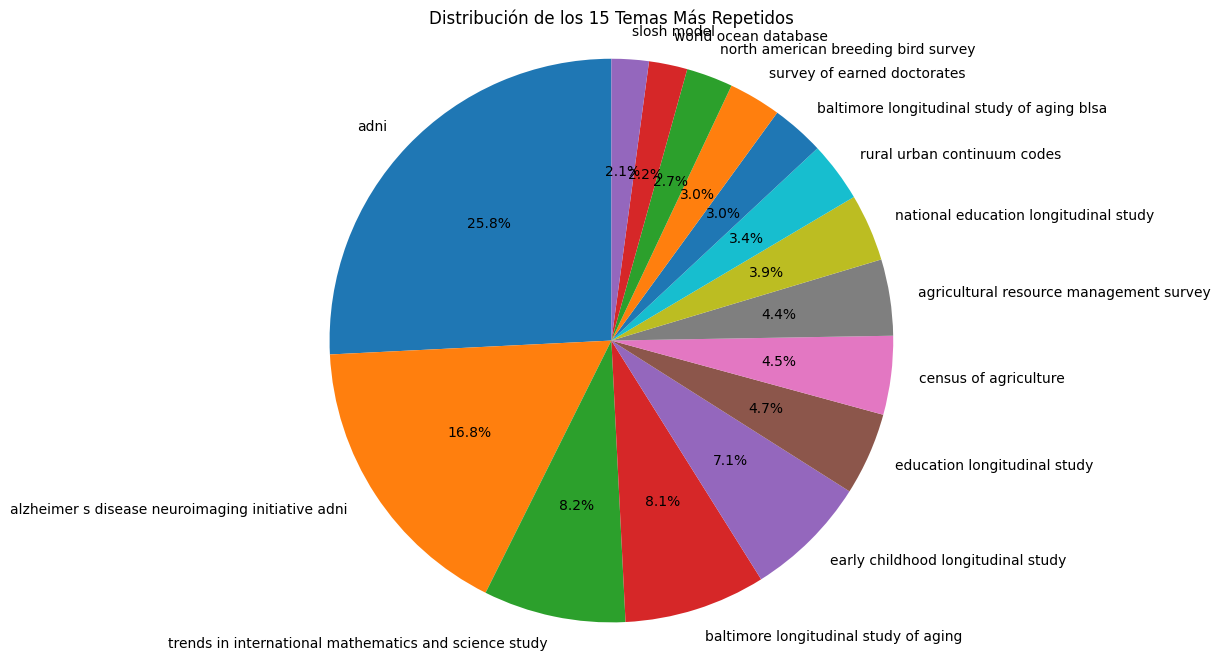

In [ ]:
import matplotlib.pyplot as plt

# Contar la cantidad de filas por cada tema
tema_counts = data[column_name].value_counts()

# Seleccionar los 20 temas más frecuentes
top_15_temas = tema_counts.head(15)

# Crear un DataFrame para mostrar los resultados ordenados
tema_summary = top_15_temas.reset_index()
tema_summary.columns = ['Tema', 'Cantidad']

# Mostrar el resumen
print(tema_summary)

# Crear un gráfico de tarta con los 20 temas más repetidos
plt.figure(figsize=(8, 8))
plt.pie(top_15_temas, labels=top_15_temas.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de los 15 Temas Más Repetidos')
plt.axis('equal')
plt.show()



No tenemos que realizar una limpieza del tema. Sin embargo, procedemos a limpiar el texto de los títulos.


In [ ]:
pip install nltk


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 31.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from spellchecker import SpellChecker

df=data


def limpiar_texto(texto):
    # Eliminar todas las palabras que contienen 'http' o 'https'
    texto = re.sub(r'https?://\S+', '', texto)  # Eliminar palabras completas con http/https
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)  # Eliminar caracteres no alfabéticos
    texto = re.sub(r'@\w+', '', texto)  # Eliminar menciones
    texto = re.sub(r'#\w+', '', texto)  # Eliminar hashtags
    texto = texto.lower()  # Convertir a minúsculas
    return texto


#Corregir errores ortográficos
from spellchecker import SpellChecker
spell = SpellChecker()

def corregir_errores(texto):
    palabras = texto.split()
    palabras_corregidas = [
        spell.correction(word) if word in spell else word
        for word in palabras
    ]
    return ' '.join(palabras_corregidas)


# Eliminar puntuación, números y palabras vacías
stop_words = set(stopwords.words("english"))
ps = PorterStemmer()  # Crear el stemmer

def procesar_texto(texto):
    # Tokenizar (dividir el texto en palabras)
    palabras = texto.split()
    # Eliminar palabras vacías, números y aplicar stemming
    palabras = [ps.stem(word) for word in palabras if word not in stop_words]
    return ' '.join(palabras)

df['cleaned_title'] = df['pub_title'].apply(limpiar_texto)
df['cleaned_title'] = df['pub_title'].apply(corregir_errores)
df['cleaned_title'] = df['pub_title'].apply(procesar_texto)



Ya hemos limpiado los textos

In [ ]:
df.head()

,Id,pub_title,dataset_title,dataset_label,cleaned_label,cleaned_title
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,the impact dual enrol colleg degre attainment:...
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,educ attain high school dropout 8 year later. ...
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,differ outcom femal male student special educ
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,step stone option valu model postsecondari educ
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,"parent effort, school resources, student achiev"


Buscamos las palabras más repetidas por temas:


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Preprocesamiento básico: tokenización y eliminación de stop words
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())  # Tokenización y conversión a minúsculas
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Filtrar stopwords y puntuación
    return tokens

# Preprocesamos los títulos de las publicaciones
data['tokens'] = data['pub_title'].apply(preprocess)

# Entrenamos el modelo Word2Vec
model = Word2Vec(sentences=data['tokens'], vector_size=10, window=5, min_count=1, workers=4)

# Vectorizar los títulos con el modelo Word2Vec
def vectorize_title(tokens):
    # Para cada título, calculamos el vector promedio de sus palabras
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:  # Si no hay palabras en el vocabulario de Word2Vec
        return [0] * model.vector_size
    return [sum(vec) / len(vectors) for vec in zip(*vectors)]  # Promediamos los vectores

# Aplicar la vectorización a los títulos
X = data['tokens'].apply(vectorize_title)

# Convertir a DataFrame para poder visualizar los resultados
X_df = pd.DataFrame(list(X), columns=[f'feature_{i}' for i in range(10)])

# Añadir la columna de tema (cleaned_label) a las palabras vectorizadas
X_df['Tema'] = data['cleaned_label']

# Agrupar por tema (cleaned_label) y calcular la media de los vectores por tema
tema_palabras_frecuencia = X_df.groupby('Tema').mean()

# Mostrar las características promedio de cada tema
for tema in tema_palabras_frecuencia.index:
    print(f"Características promedio del tema '{tema}':")
    print(tema_palabras_frecuencia.loc[tema])
    print("\n")


Características promedio del tema '2019 ncov complete genome sequences':
feature_0    1.028851
feature_1   -0.751399
feature_2    0.293886
feature_3   -0.159480
feature_4    0.082666
feature_5    0.318500
feature_6    1.272564
feature_7    0.693027
feature_8   -1.429883
feature_9   -1.312968
Name: 2019 ncov complete genome sequences, dtype: float64


Características promedio del tema '2019 ncov genome sequence':
feature_0    0.945193
feature_1   -0.518365
feature_2    0.787026
feature_3   -0.144858
feature_4    0.454502
feature_5    0.337441
feature_6    1.019124
feature_7    0.831451
feature_8   -1.109547
feature_9   -1.031073
Name: 2019 ncov genome sequence, dtype: float64


Características promedio del tema '2019 ncov genome sequences':
feature_0    1.089970
feature_1   -0.706422
feature_2    0.727527
feature_3   -0.146567
feature_4    0.480619
feature_5    0.559749
feature_6    1.444624
feature_7    1.013701
feature_8   -1.765171
feature_9   -1.284329
Name: 2019 ncov genome sequenc

In [ ]:
print(X_df.tail())

       feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
19656   0.891584  -0.451283   1.267742  -0.005684   0.816903   0.408148   
19657   0.850853  -0.544729   0.471270  -0.216766   0.199184   0.466041   
19658   0.948921  -0.702894   0.597209  -0.258251   0.323975   0.640131   
19659   0.838546  -0.423808   0.731646   0.019229   0.725681   0.645917   
19660   0.838546  -0.423808   0.731646   0.019229   0.725681   0.645917   

       feature_6  feature_7  feature_8  feature_9  \
19656   0.993802   1.244801  -1.369005  -1.076723   
19657   1.219621   0.648641  -1.339444  -1.084747   
19658   1.577082   1.000690  -1.886594  -1.270616   
19659   1.332332   0.729840  -1.793383  -1.038091   
19660   1.332332   0.729840  -1.793383  -1.038091   

                                                    Tema  
19656   rsna international covid open radiology database  
19657  cas covid 19 antiviral candidate compounds dat...  
19658  cas covid 19 antiviral candidate compounds dat

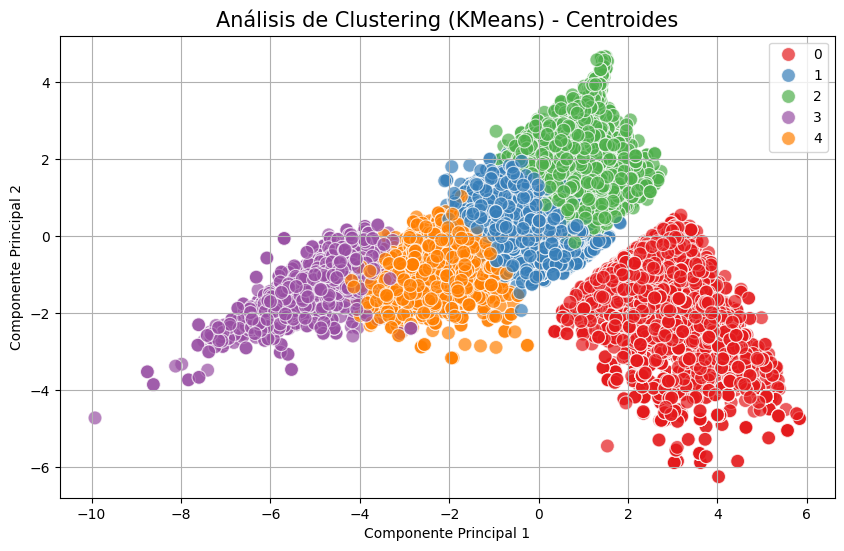

In [ ]:
# Instalar las bibliotecas necesarias (si no están instaladas)
# pip install matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Supongamos que tienes una matriz de vectores llamada 'temas_vectores' en un DataFrame
# Asegúrate de que tus vectores sean una matriz o DataFrame

# Ejemplo de cómo crear un DataFrame con tus vectores de temas:
# temas_vectores = pd.DataFrame(vectores)  # Si ya tienes la matriz de vectores, la conviertes en DataFrame

# Normalización de los datos
scaler = StandardScaler()
temas_scaled = scaler.fit_transform(X_df.drop('Tema', axis=1))

# Realizar KMeans clustering
n_clusters = 5  # Ajusta este valor según el número de clústeres que quieras
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(temas_scaled)

# Obtener los clústeres asignados a cada punto
clusters = kmeans.labels_

# Obtener los centroides de cada clúster
centroids = kmeans.cluster_centers_

# Crear un DataFrame con los resultados
X_df['Cluster'] = clusters

# Visualizar los resultados (PCA para reducir dimensiones a 2D para visualización)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(temas_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Graficar los puntos y los centroides en el espacio 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', s=100, alpha=0.7)

plt.title('Análisis de Clustering (KMeans) - Centroides', fontsize=15)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()




##Nube de palabras

In [ ]:

#Generar la nube
wordcloud = WordCloud(
    width=800,
    height=400,
    max_words=20,
    background_color='white',
    colormap='cividis'
).generate(df['cleaned_title'])

##Análisis de sentimientos